<a href="https://colab.research.google.com/github/rafidannovianto/python/blob/main/Tugas%20pertemuan%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

3scene/          dataset/        Untitled0.ipynb
coast_test1.jpg  nnmodel_scene/  Untitled1.ipynb
coast_test.jpg   Untitled        Untitled2.ipynb


In [4]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [6]:
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [7]:
for imagePath in imagePaths:
	image = Image.open(imagePath)

	image = np.array(image.resize((64, 64))) / 255.0 
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [8]:
print(labels)

['GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04',

In [9]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [10]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [11]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(445, 64, 64, 3)
(149, 64, 64, 3)


In [74]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (8,8), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(25, (8,8), activation='relu'))
model1.add(MaxPooling2D(2,2))

model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(15, activation='relu'))
model1.add(Dense(15, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 57, 57, 16)        3088      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 21, 21, 25)        25625     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 10, 10, 25)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 2500)              0         
_________________________________________________________________
dense_109 (Dense)            (None, 100)               250100    
_________________________________________________________________
dense_110 (Dense)            (None, 15)              

In [75]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=27, batch_size=35)

[INFO] training network...
Epoch 1/27
13/13 [==============================] - 4s 270ms/step - loss: 1.6087 - accuracy: 0.2067 - val_loss: 1.6185 - val_accuracy: 0.1544
Epoch 2/27
13/13 [==============================] - 3s 259ms/step - loss: 1.5714 - accuracy: 0.2472 - val_loss: 1.5848 - val_accuracy: 0.3221
Epoch 3/27
13/13 [==============================] - 3s 260ms/step - loss: 1.5546 - accuracy: 0.3056 - val_loss: 1.5561 - val_accuracy: 0.3624
Epoch 4/27
13/13 [==============================] - 3s 257ms/step - loss: 1.5050 - accuracy: 0.3438 - val_loss: 1.5242 - val_accuracy: 0.4295
Epoch 5/27
13/13 [==============================] - 3s 263ms/step - loss: 1.4800 - accuracy: 0.3730 - val_loss: 1.4742 - val_accuracy: 0.4027
Epoch 6/27
13/13 [==============================] - 3s 263ms/step - loss: 1.3853 - accuracy: 0.4360 - val_loss: 1.3432 - val_accuracy: 0.4430
Epoch 7/27
13/13 [==============================] - 3s 258ms/step - loss: 1.3020 - accuracy: 0.4607 - val_loss: 1.2467 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


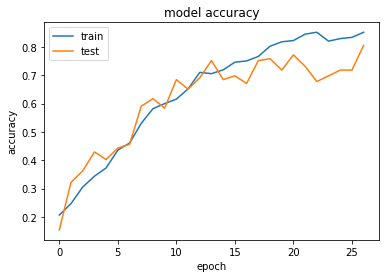

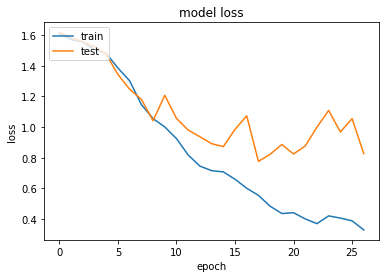

In [77]:
import matplotlib.pyplot as plt

print(H.history.keys())

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_02       0.83      0.88      0.85        40
      GMB_04       0.77      0.71      0.74        34
      GMB_05       0.76      0.93      0.83        27
      GMB_06       0.84      0.70      0.76        23
      GMB_08       0.83      0.80      0.82        25

    accuracy                           0.81       149
   macro avg       0.81      0.80      0.80       149
weighted avg       0.81      0.81      0.80       149

